### predicting the count of bike shares using different models and comparing the results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
data=pd.read_csv('london_merged.csv')
data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [3]:
data.timestamp=pd.to_datetime(data.timestamp)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [4]:
## Dividing the dataset into dependant and independant columns
X=data.drop(['timestamp','cnt'],axis=1)
y=data['cnt']
X.head()

,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [5]:
## performing train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12189, 8)
(5225, 8)
(12189,)
(5225,)


In [6]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled

array([[ 0.08776634,  0.21636811, -0.64003462, ..., -0.14936473,
        -0.63759805,  0.45769774],
       [ 1.43092859,  1.349039  , -0.70933142, ..., -0.14936473,
        -0.63759805, -0.43850752],
       [ 1.25184029,  1.19801622, -1.22905744, ..., -0.14936473,
        -0.63759805, -0.43850752],
       ...,
       [ 0.26685464,  0.3673909 ,  0.67660462, ..., -0.14936473,
        -0.63759805, -0.43850752],
       [-1.34494005, -1.44488253,  0.43406581, ..., -0.14936473,
         1.56838623,  1.35390299],
       [ 0.62503124,  0.66943647, -0.29355061, ..., -0.14936473,
        -0.63759805,  0.45769774]])

In [7]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(12189, 8)
(5225, 8)


In [8]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np
models={
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForrestRegressor':RandomForestRegressor(),
    'XGBRegressor':XGBRegressor()
}

def model_building(model_dict:dict,X_train_scaled,X_test_scaled,y_train,y_test):
    r2_scores={}
    rmse={}
    for name,reg in model_dict.items():
        reg.fit(X_train_scaled,y_train)
        y_pred=reg.predict(X_test_scaled)
        r2=r2_score(y_test,y_pred)
        rmse_score=np.sqrt(mean_squared_error(y_test,y_pred))
        r2_scores[name]=r2
        rmse[name]=rmse_score
    print(" R2 score results: ")
    for name,r2 in r2_scores.items():
        print(f"{name} : {r2:.2f}")
    print(" RMSE results: ")
    for name,rms in rmse.items():
        print(f"{name} : {rms:.2f}")


model_building(models,X_train_scaled,X_test_scaled,y_train,y_test)

 R2 score results: 
DecisionTreeRegressor : -0.35
RandomForrestRegressor : 0.26
XGBRegressor : 0.30
 RMSE results: 
DecisionTreeRegressor : 1265.92
RandomForrestRegressor : 937.03
XGBRegressor : 913.94


XG Boost Regressor performs the best

In [11]:
xgb_model=XGBRegressor()
xgb_model.fit(X_train_scaled,y_train)
pred=xgb_model.predict(X_test_scaled)
rmse_score=np.sqrt(mean_squared_error(y_test,pred))

In [12]:
rmse_score

913.9420193562173

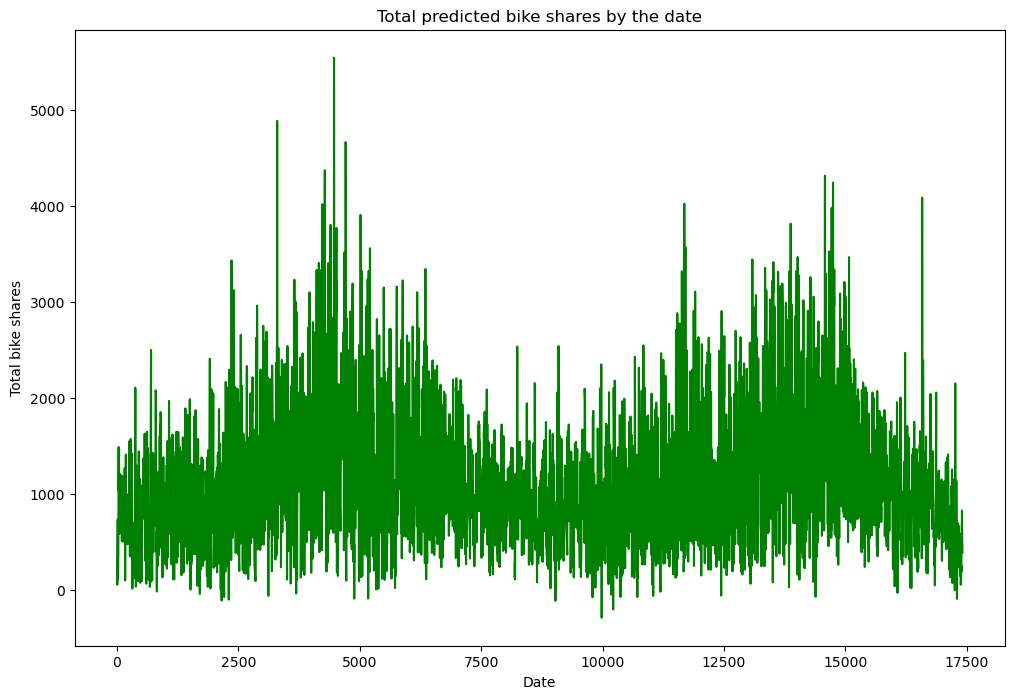

In [21]:
plt.figure(figsize=(12,8))
sns.lineplot(x=X_test.index,y=pred,color='green')
plt.xlabel('Date')
plt.ylabel('Total bike shares')
plt.title('Total predicted bike shares by the date')
plt.show()

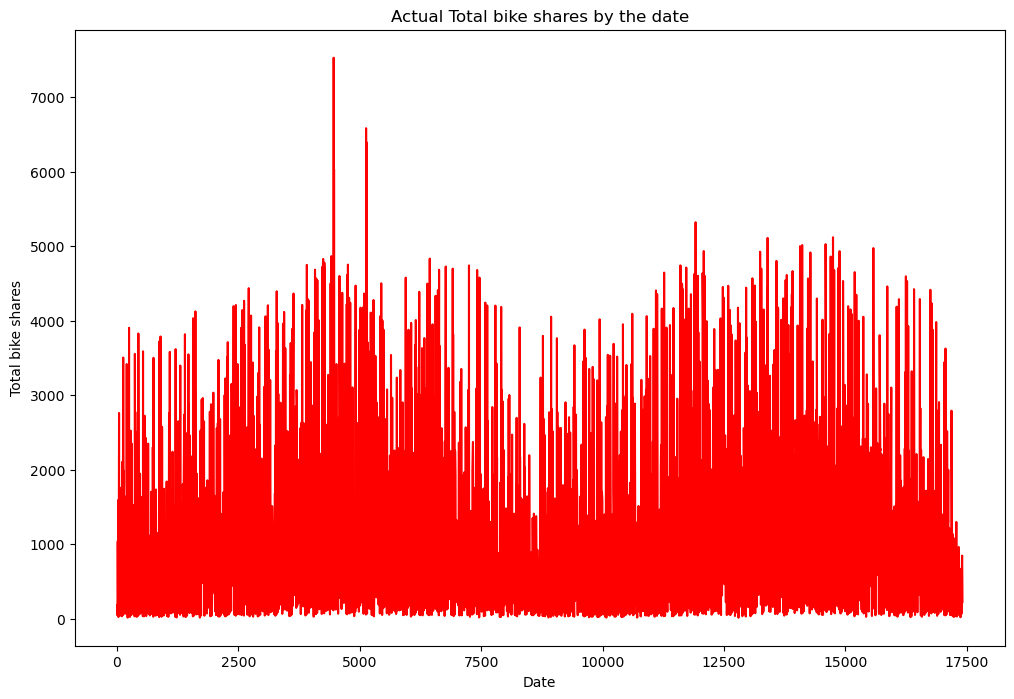

In [22]:
plt.figure(figsize=(12,8))
sns.lineplot(x=X_test.index,y=y_test,color='red')
plt.xlabel('Date')
plt.ylabel('Total bike shares')
plt.title('Actual Total bike shares by the date')
plt.show()